# Results on small dataset with original network and saved param (low bc cpu on macbook)
550/550 [==============================] - 295s 505ms/step - AbsRel: 0.0210 - SqRel: 0.4003 - RMSE: 2.6844 - RMSE_log: 0.0607 - Delta1: 0.9859 - Delta2: 0.9928 - Delta3: 0.9954

21/21 [==============================] - 38s 1s/step - AbsRel: 0.0079 - SqRel: 0.0407 - RMSE: 1.4813 - RMSE_log: 0.0276 - Delta1: 0.9981 - Delta2: 0.9990 - Delta3: 0.9997

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from dataloaders.midair import DataLoaderMidAir as MidAir
from dataloaders import DataloaderParameters

param = DataloaderParameters({
                               '_comment': '/Users/pascalleroy/Documents/m4depth/M4Depth/relative paths should be written relative to this file',
                                 'midair': '/Users/pascalleroy/Documents/m4depth/M4Depth/datasets/MidAir',
                                 'kitti-raw': '/Users/pascalleroy/Documents/m4depth/M4Depth/datasets/Kitti',
                                 'tartanair': '/Users/pascalleroy/Documents/m4depth/M4Depth/datasets/TartanAir'},
                             'data/midair/small_test_data',
                             None,
                             4,
                             True)

chosen_dataloader = MidAir()
chosen_dataloader.get_dataset("eval", param, batch_size=1)
data = chosen_dataloader.dataset

In [15]:
from importlib import reload
import os
from utils.depth_operations_functionnal import *

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow import keras as ks
from keras.utils import vis_utils
from metrics import AbsRelError, SqRelError, RootMeanSquaredError, \
    RootMeanSquaredLogError, ThresholdRelError

from callbacks import CustomCheckpointCallback

print(tf.__version__)
from m4depth_network import M4Depth, M4depthAblationParameters

ablation_settings = M4depthAblationParameters()

print(tf.config.list_physical_devices('GPU'))
model = M4Depth(nbre_levels=6, ablation_settings=ablation_settings)

weights_dir = os.path.join("pretrained_weights/midair/", "best")
model_checkpoint_cbk = CustomCheckpointCallback(weights_dir,
                                                resume_training=True)
model.compile(metrics=[AbsRelError(),
                       SqRelError(),
                       RootMeanSquaredError(),
                       RootMeanSquaredLogError(),
                       ThresholdRelError(1), ThresholdRelError(2),
                       ThresholdRelError(3)])

metrics = model.evaluate(data, callbacks=[model_checkpoint_cbk])
print(metrics)

2.9.1
[]
Checkpoint save directory: pretrained_weights/midair/best
Latest checkpoint found: pretrained_weights/midair/best/cp-0071.ckpt
Restoring weights from pretrained_weights/midair/best/cp-0071.ckpt
Seq sample 0


Temporal memory instanciation


AttributeError: in user code:

    File "/Users/pascalleroy/Documents/m4depth/M4Depth/env/lib/python3.8/site-packages/keras/engine/training.py", line 1557, in test_function  *
        return step_function(self, iterator)
    File "/Users/pascalleroy/Documents/m4depth/M4Depth/m4depth_network.py", line 457, in test_step  *
        preds = self([[data], data["camera"]], training=False)
    File "/Users/pascalleroy/Documents/m4depth/M4Depth/env/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler  **
        raise e.with_traceback(filtered_tb) from None
    File "/var/folders/z_/cgwpz9z57_l8flrcm90f9p580000gn/T/__autograph_generated_fileyprrsl8z.py", line 27, in tf__call
        d_maps_pyrs = ag__.converted_call(ag__.ld(self).d_estimator, (ag__.ld(f_maps_pyrs), ag__.ld(traj_samples), ag__.ld(camera), ag__.ld(training)), None, fscope)
    File "/var/folders/z_/cgwpz9z57_l8flrcm90f9p580000gn/T/__autograph_generated_filekg3nkuw8.py", line 115, in tf__call
        ag__.for_stmt(ag__.converted_call(ag__.ld(enumerate), (ag__.converted_call(ag__.ld(zip), (ag__.ld(f_maps_pyrs), ag__.ld(traj_samples)), None, fscope),), None, fscope), None, loop_body_1, get_state_4, set_state_4, (), {'iterate_names': '(seq_i, (f_pyr_curr, sample))'})
    File "/var/folders/z_/cgwpz9z57_l8flrcm90f9p580000gn/T/__autograph_generated_filekg3nkuw8.py", line 96, in loop_body_1
        ag__.for_stmt(ag__.converted_call(ag__.ld(enumerate), (ag__.converted_call(ag__.ld(zip), (ag__.ld(f_pyr_curr)[::(- 1)], ag__.ld(self).levels[::(- 1)]), None, fscope),), None, fscope), None, loop_body, get_state_3, set_state_3, ('d_est_curr', 'cnter'), {'iterate_names': '(l, (f_maps_curr, level))'})
    File "/var/folders/z_/cgwpz9z57_l8flrcm90f9p580000gn/T/__autograph_generated_filekg3nkuw8.py", line 93, in loop_body
        ag__.if_stmt((ag__.ld(d_est_curr) is None), if_body_2, else_body_2, get_state_2, set_state_2, ('d_est_curr',), 1)
    File "/var/folders/z_/cgwpz9z57_l8flrcm90f9p580000gn/T/__autograph_generated_filekg3nkuw8.py", line 88, in if_body_2
        d_est_curr = [ag__.converted_call(ag__.ld(level), (ag__.ld(f_maps_curr), None, ag__.ld(local_rot), ag__.ld(local_trans), ag__.ld(local_camera), ag__.ld(new_traj)), dict(prev_f_maps=ag__.ld(f_maps_prev), prev_t_depth=ag__.ld(d_est_prev)), fscope)]
    File "/var/folders/z_/cgwpz9z57_l8flrcm90f9p580000gn/T/__autograph_generated_file7ua2xfn1.py", line 226, in tf__call
        ag__.if_stmt(ag__.or_((lambda : (ag__.ld(prev_t_depth) is None)), (lambda : ag__.ld(new_traj)[0])), if_body_10, else_body_10, get_state_10, set_state_10, ('do_return', 'retval_', 'prev_t_depth'), 2)
    File "/var/folders/z_/cgwpz9z57_l8flrcm90f9p580000gn/T/__autograph_generated_file7ua2xfn1.py", line 172, in else_body_10
        ag__.if_stmt(ag__.ld(self).ablation.SNCV, if_body_7, else_body_7, get_state_7, set_state_7, (), 0)
    File "/var/folders/z_/cgwpz9z57_l8flrcm90f9p580000gn/T/__autograph_generated_file7ua2xfn1.py", line 166, in if_body_7
        autocorr = ag__.converted_call(ag__.ld(cost_volume), (ag__.ld(curr_f_maps), ag__.ld(curr_f_maps), 3), dict(nbre_cuts=ag__.ld(nbre_cuts)), fscope)
    File "/var/folders/z_/cgwpz9z57_l8flrcm90f9p580000gn/T/__autograph_generated_filenh3ub0q3.py", line 15, in tf__get_disparity_sweeping_cv
        disp = ag__.converted_call(ag__.ld(tile_in_batch), (ag__.ld(disp), ag__.ld(nbre_copies)), None, fscope)
    File "/var/folders/z_/cgwpz9z57_l8flrcm90f9p580000gn/T/__autograph_generated_file80tyrwcs.py", line 10, in tf__tile_in_batch
        map_shape = ag__.converted_call(ag__.converted_call(ag__.ld(map).get_shape, (), None, fscope).as_list, (), None, fscope)

    AttributeError: Exception encountered when calling layer "m4_depth_10" (type M4Depth).
    
    in user code:
    
        File "/Users/pascalleroy/Documents/m4depth/M4Depth/m4depth_network.py", line 362, in call  *
            d_maps_pyrs = self.d_estimator(f_maps_pyrs, traj_samples, camera, training)
        File "/Users/pascalleroy/Documents/m4depth/M4Depth/env/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler  **
            raise e.with_traceback(filtered_tb) from None
        File "/var/folders/z_/cgwpz9z57_l8flrcm90f9p580000gn/T/__autograph_generated_filekg3nkuw8.py", line 115, in tf__call
            ag__.for_stmt(ag__.converted_call(ag__.ld(enumerate), (ag__.converted_call(ag__.ld(zip), (ag__.ld(f_maps_pyrs), ag__.ld(traj_samples)), None, fscope),), None, fscope), None, loop_body_1, get_state_4, set_state_4, (), {'iterate_names': '(seq_i, (f_pyr_curr, sample))'})
        File "/var/folders/z_/cgwpz9z57_l8flrcm90f9p580000gn/T/__autograph_generated_filekg3nkuw8.py", line 96, in loop_body_1
            ag__.for_stmt(ag__.converted_call(ag__.ld(enumerate), (ag__.converted_call(ag__.ld(zip), (ag__.ld(f_pyr_curr)[::(- 1)], ag__.ld(self).levels[::(- 1)]), None, fscope),), None, fscope), None, loop_body, get_state_3, set_state_3, ('d_est_curr', 'cnter'), {'iterate_names': '(l, (f_maps_curr, level))'})
        File "/var/folders/z_/cgwpz9z57_l8flrcm90f9p580000gn/T/__autograph_generated_filekg3nkuw8.py", line 93, in loop_body
            ag__.if_stmt((ag__.ld(d_est_curr) is None), if_body_2, else_body_2, get_state_2, set_state_2, ('d_est_curr',), 1)
        File "/var/folders/z_/cgwpz9z57_l8flrcm90f9p580000gn/T/__autograph_generated_filekg3nkuw8.py", line 88, in if_body_2
            d_est_curr = [ag__.converted_call(ag__.ld(level), (ag__.ld(f_maps_curr), None, ag__.ld(local_rot), ag__.ld(local_trans), ag__.ld(local_camera), ag__.ld(new_traj)), dict(prev_f_maps=ag__.ld(f_maps_prev), prev_t_depth=ag__.ld(d_est_prev)), fscope)]
        File "/var/folders/z_/cgwpz9z57_l8flrcm90f9p580000gn/T/__autograph_generated_file7ua2xfn1.py", line 226, in tf__call
            ag__.if_stmt(ag__.or_((lambda : (ag__.ld(prev_t_depth) is None)), (lambda : ag__.ld(new_traj)[0])), if_body_10, else_body_10, get_state_10, set_state_10, ('do_return', 'retval_', 'prev_t_depth'), 2)
        File "/var/folders/z_/cgwpz9z57_l8flrcm90f9p580000gn/T/__autograph_generated_file7ua2xfn1.py", line 172, in else_body_10
            ag__.if_stmt(ag__.ld(self).ablation.SNCV, if_body_7, else_body_7, get_state_7, set_state_7, (), 0)
        File "/var/folders/z_/cgwpz9z57_l8flrcm90f9p580000gn/T/__autograph_generated_file7ua2xfn1.py", line 166, in if_body_7
            autocorr = ag__.converted_call(ag__.ld(cost_volume), (ag__.ld(curr_f_maps), ag__.ld(curr_f_maps), 3), dict(nbre_cuts=ag__.ld(nbre_cuts)), fscope)
        File "/var/folders/z_/cgwpz9z57_l8flrcm90f9p580000gn/T/__autograph_generated_filenh3ub0q3.py", line 15, in tf__get_disparity_sweeping_cv
            disp = ag__.converted_call(ag__.ld(tile_in_batch), (ag__.ld(disp), ag__.ld(nbre_copies)), None, fscope)
        File "/var/folders/z_/cgwpz9z57_l8flrcm90f9p580000gn/T/__autograph_generated_file80tyrwcs.py", line 10, in tf__tile_in_batch
            map_shape = ag__.converted_call(ag__.converted_call(ag__.ld(map).get_shape, (), None, fscope).as_list, (), None, fscope)
    
        AttributeError: Exception encountered when calling layer "depth_estimator_pyramid_10" (type DepthEstimatorPyramid).
        
        in user code:
        
            File "/Users/pascalleroy/Documents/m4depth/M4Depth/m4depth_network.py", line 314, in call  *
                d_est_curr = [level(f_maps_curr, None, local_rot, local_trans, local_camera, new_traj,
            File "/Users/pascalleroy/Documents/m4depth/M4Depth/env/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler  **
                raise e.with_traceback(filtered_tb) from None
            File "/var/folders/z_/cgwpz9z57_l8flrcm90f9p580000gn/T/__autograph_generated_file7ua2xfn1.py", line 226, in tf__call
                ag__.if_stmt(ag__.or_((lambda : (ag__.ld(prev_t_depth) is None)), (lambda : ag__.ld(new_traj)[0])), if_body_10, else_body_10, get_state_10, set_state_10, ('do_return', 'retval_', 'prev_t_depth'), 2)
            File "/var/folders/z_/cgwpz9z57_l8flrcm90f9p580000gn/T/__autograph_generated_file7ua2xfn1.py", line 172, in else_body_10
                ag__.if_stmt(ag__.ld(self).ablation.SNCV, if_body_7, else_body_7, get_state_7, set_state_7, (), 0)
            File "/var/folders/z_/cgwpz9z57_l8flrcm90f9p580000gn/T/__autograph_generated_file7ua2xfn1.py", line 166, in if_body_7
                autocorr = ag__.converted_call(ag__.ld(cost_volume), (ag__.ld(curr_f_maps), ag__.ld(curr_f_maps), 3), dict(nbre_cuts=ag__.ld(nbre_cuts)), fscope)
            File "/var/folders/z_/cgwpz9z57_l8flrcm90f9p580000gn/T/__autograph_generated_filenh3ub0q3.py", line 15, in tf__get_disparity_sweeping_cv
                disp = ag__.converted_call(ag__.ld(tile_in_batch), (ag__.ld(disp), ag__.ld(nbre_copies)), None, fscope)
            File "/var/folders/z_/cgwpz9z57_l8flrcm90f9p580000gn/T/__autograph_generated_file80tyrwcs.py", line 10, in tf__tile_in_batch
                map_shape = ag__.converted_call(ag__.converted_call(ag__.ld(map).get_shape, (), None, fscope).as_list, (), None, fscope)
        
            AttributeError: Exception encountered when calling layer "depth_estimator_level_65" (type DepthEstimatorLevel).
            
            in user code:
            
                File "/Users/pascalleroy/Documents/m4depth/M4Depth/m4depth_network.py", line 232, in call  *
                    autocorr = cost_volume(curr_f_maps, curr_f_maps, 3, nbre_cuts=nbre_cuts)
                File "/Users/pascalleroy/Documents/m4depth/M4Depth/utils/depth_operations_functionnal.py", line 318, in get_disparity_sweeping_cv  *
                    disp = tile_in_batch(disp, nbre_copies)
                File "/Users/pascalleroy/Documents/m4depth/M4Depth/utils/depth_operations_functionnal.py", line 298, in tile_in_batch  *
                    map_shape = map.get_shape().as_list()
            
                AttributeError: 'str' object has no attribute 'get_shape'
            
            
            Call arguments received by layer "depth_estimator_level_65" (type DepthEstimatorLevel):
              • curr_f_maps=tf.Tensor(shape=(1, 6, 6, 192), dtype=float32)
              • prev_l_est=None
              • rot=tf.Tensor(shape=(1, 4), dtype=float32)
              • trans=tf.Tensor(shape=(1, 3), dtype=float32)
              • camera={'f': 'tf.Tensor(shape=(1, 2), dtype=float32)', 'c': 'tf.Tensor(shape=(1, 2), dtype=float32)'}
              • new_traj=tf.Tensor(shape=(1,), dtype=bool)
              • prev_f_maps=None
              • prev_t_depth=None
        
        
        Call arguments received by layer "depth_estimator_pyramid_10" (type DepthEstimatorPyramid):
          • f_maps_pyrs=[['tf.Tensor(shape=(1, 192, 192, 16), dtype=float32)', 'tf.Tensor(shape=(1, 96, 96, 32), dtype=float32)', 'tf.Tensor(shape=(1, 48, 48, 64), dtype=float32)', 'tf.Tensor(shape=(1, 24, 24, 96), dtype=float32)', 'tf.Tensor(shape=(1, 12, 12, 128), dtype=float32)', 'tf.Tensor(shape=(1, 6, 6, 192), dtype=float32)']]
          • traj_samples=[{'camera': {'f': 'tf.Tensor(shape=(1, 2), dtype=float32)', 'c': 'tf.Tensor(shape=(1, 2), dtype=float32)'}, 'RGB_im': 'tf.Tensor(shape=(1, 384, 384, 3), dtype=float32)', 'rot': 'tf.Tensor(shape=(1, 4), dtype=float32)', 'trans': 'tf.Tensor(shape=(1, 3), dtype=float32)', 'new_traj': 'tf.Tensor(shape=(1,), dtype=bool)', 'depth': 'tf.Tensor(shape=(1, 384, 384, 1), dtype=float32)'}]
          • camera={'f': 'tf.Tensor(shape=(1, 2), dtype=float32)', 'c': 'tf.Tensor(shape=(1, 2), dtype=float32)'}
          • training=False
    
    
    Call arguments received by layer "m4_depth_10" (type M4Depth):
      • data=[[{'camera': {'f': 'tf.Tensor(shape=(1, 2), dtype=float32)', 'c': 'tf.Tensor(shape=(1, 2), dtype=float32)'}, 'RGB_im': 'tf.Tensor(shape=(1, 384, 384, 3), dtype=float32)', 'rot': 'tf.Tensor(shape=(1, 4), dtype=float32)', 'trans': 'tf.Tensor(shape=(1, 3), dtype=float32)', 'new_traj': 'tf.Tensor(shape=(1,), dtype=bool)', 'depth': 'tf.Tensor(shape=(1, 384, 384, 1), dtype=float32)'}], {'f': 'tf.Tensor(shape=(1, 2), dtype=float32)', 'c': 'tf.Tensor(shape=(1, 2), dtype=float32)'}]
      • training=False


In [8]:
first_sample = data.take(1)
model.predict(first_sample, callbacks=[model_checkpoint_cbk])

is_first_run = True

# Do what you want with the outputs
for i, sample in enumerate(data):
    if not is_first_run and sample["new_traj"]:
        print("End of trajectory")
    print(i)
    is_first_run = False
    est = model.predict(first_sample,
                        verbose=2)  # Run network to get estimates
    d_est = est["depth"][0, :, :,
            :]  # Estimate : [h,w,1] matrix with depth in meter
    d_gt = sample['depth'][0, :, :,
           :]  # Ground truth : [h,w,1] matrix with depth in meter
    i_rgb = sample['RGB_im'][0, :, :,
            :]  # RGB image : [h,w,3] matrix with rgb channels ranging between 0 and 1


18
19
20
Restoring weights from pretrained_weights/midair/best/cp-0071.ckpt
1/1 [==============================] - 0s 220ms/step
0
1/1 - 0s - 194ms/epoch - 194ms/step
1
1/1 - 0s - 197ms/epoch - 197ms/step
2
1/1 - 0s - 159ms/epoch - 159ms/step
3
1/1 - 0s - 192ms/epoch - 192ms/step
4
1/1 - 0s - 149ms/epoch - 149ms/step
5
1/1 - 0s - 213ms/epoch - 213ms/step
6
1/1 - 0s - 198ms/epoch - 198ms/step
7
1/1 - 0s - 183ms/epoch - 183ms/step
8
1/1 - 0s - 179ms/epoch - 179ms/step
9
1/1 - 0s - 190ms/epoch - 190ms/step
10
1/1 - 0s - 162ms/epoch - 162ms/step
11
1/1 - 0s - 247ms/epoch - 247ms/step
12
1/1 - 0s - 206ms/epoch - 206ms/step
13
1/1 - 0s - 235ms/epoch - 235ms/step
14
1/1 - 0s - 242ms/epoch - 242ms/step
15
1/1 - 0s - 197ms/epoch - 197ms/step
16
1/1 - 0s - 204ms/epoch - 204ms/step
17
1/1 - 0s - 212ms/epoch - 212ms/step
18
1/1 - 0s - 198ms/epoch - 198ms/step
19
1/1 - 0s - 211ms/epoch - 211ms/step
20
1/1 - 0s - 185ms/epoch - 185ms/step


In [64]:
print(model.encoder.layers())

AttributeError: 'FeaturePyramid' object has no attribute 'layers'

In [1]:
model = M4Depth(nbre_levels=6, ablation_settings=ablation_settings)

model_checkpoint_cbk = CustomCheckpointCallback(weights_dir,
                                                resume_training=True)
model.compile(metrics=[AbsRelError(),
                       SqRelError(),
                       RootMeanSquaredError(),
                       RootMeanSquaredLogError(),
                       ThresholdRelError(1), ThresholdRelError(2),
                       ThresholdRelError(3)])

metrics = model.evaluate(data, callbacks=[model_checkpoint_cbk])

NameError: name 'M4Depth' is not defined

In [ ]:
print(conv_layers_s1.weights)

In [ ]:
x = data.take(1)
model2 = ks.Model(inputs=x, outputs=model.call(x))
print(model2.summary())

In [6]:
model_mobilenet = tf.keras.applications.MobileNetV2(
    input_shape=None,
    alpha=1.0,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax"
)



In [32]:
print(model_mobilenet.get_config()["output_layers"])
print(model_mobilenet.summary())
#vis_utils.plot_model(model_mobilenet, to_file='model.png', show_shapes=True,
#expand_nested=True, dpi=300)

[['predictions', 0, 0]]
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                      

Model: "m4_depth"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_pyramid (FeaturePyr  multiple                 1022192   
 amid)                                                           
                                                                 
 depth_estimator_pyramid (De  multiple                 4632018   
 pthEstimatorPyramid)                                            
                                                                 
Total params: 5,654,211
Trainable params: 4,492,238
Non-trainable params: 1,161,973
_________________________________________________________________
None


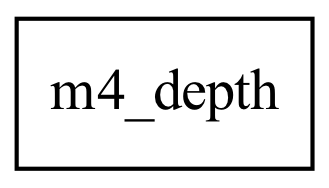

In [8]:
from keras.utils import vis_utils

print(model.summary(expand_nested=True))
#print(model.get_config())
vis_utils.plot_model(model, to_file='model.png', show_shapes=True,
                     expand_nested=True, dpi=300)

In [42]:
from m4depth_h5_network import NEWM4Depth

new_model = NEWM4Depth(nbre_levels=6, ablation_settings=ablation_settings)
new_model.compile(metrics=[AbsRelError(),
                           SqRelError(),
                           RootMeanSquaredError(),
                           RootMeanSquaredLogError(),
                           ThresholdRelError(1),
                           ThresholdRelError(2), ThresholdRelError(3)])

metrics = new_model.evaluate(data, callbacks=[model_checkpoint_cbk])

Restoring weights from pretrained_weights/midair/best/cp-0071.ckpt
Seq sample 0
Seq sample 0
21/21 [==============================] - 16s 512ms/step - AbsRel: 0.0079 - SqRel: 0.0407 - RMSE: 1.4810 - RMSE_log: 0.0276 - Delta1: 0.9981 - Delta2: 0.9990 - Delta3: 0.9997


In [43]:
first_sample = data.take(1)
a = new_model(first_sample)
print(a)

TypeError: Exception encountered when calling layer "newm4_depth_8" (type NEWM4Depth).

in user code:

    File "/Users/pascalleroy/Documents/m4depth/M4Depth/m4depth_h5_network.py", line 406, in call  *
        traj_samples = data[0]

    TypeError: '_VariantDataset' object is not subscriptable


Call arguments received by layer "newm4_depth_8" (type NEWM4Depth):
  • data=<TakeDataset element_spec={'camera': {'f': TensorSpec(shape=(1, 2), dtype=tf.float32, name=None), 'c': TensorSpec(shape=(1, 2), dtype=tf.float32, name=None)}, 'RGB_im': TensorSpec(shape=(1, 384, 384, 3), dtype=tf.float32, name=None), 'rot': TensorSpec(shape=(1, 4), dtype=tf.float32, name=None), 'trans': TensorSpec(shape=(1, 3), dtype=tf.float32, name=None), 'new_traj': TensorSpec(shape=(1,), dtype=tf.bool, name=None), 'depth': TensorSpec(shape=(1, 384, 384, 1), dtype=tf.float32, name=None)}>
  • training=False

In [40]:
for i, sample in enumerate(data):
    a = new_model.predict(sample)
    break

TypeError: in user code:

    File "/Users/pascalleroy/Documents/m4depth/M4Depth/env/lib/python3.8/site-packages/keras/engine/training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "/Users/pascalleroy/Documents/m4depth/M4Depth/m4depth_h5_network.py", line 552, in predict_step  *
        preds = self([[data], data["camera"]], training=False)

    TypeError: tuple indices must be integers or slices, not str
